In [2]:
import pandas as pd
import numpy as np

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

In [3]:
df = pd.read_csv('../data/car_price.csv')

# Exploration et nettoyage des données (EDA)

### Affichage des 10 premières lignes

In [4]:
df.head(10)

,Car ID,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Price,Model
0,1.0,Tesla,2016.0,2.3,Petrol,Manual,114832.0,New,24574.01,Model X
1,2.0,BMW,2018.0,4.4,Electric,Manual,143190.0,Used,15506.11,5 Series
2,3.0,Audi,2013.0,4.5,Electric,Manual,181601.0,New,10485.80,A4
3,4.0,Tesla,2011.0,4.1,Diesel,Automatic,68682.0,New,25755.00,Model Y
4,5.0,Ford,2009.0,2.6,Diesel,Manual,223009.0,Like New,5774.86,Mustang
5,6.0,Audi,2019.0,2.4,Diesel,Automatic,246553.0,Like New,15694.05,Q7
6,7.0,Audi,2020.0,4.0,Electric,Automatic,135486.0,Used,20723.44,Q5
7,8.0,Tesla,2017.0,5.3,Hybrid,Automatic,83030.0,New,22837.88,Model Y
8,9.0,Honda,2023.0,5.7,Electric,Manual,120360.0,Like New,12287.40,Civic
9,10.0,Ford,2010.0,1.5,Electric,Automatic,135009.0,Like New,8643.32,Explorer


### On regarde le type de chacune des colonnes

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Car ID        2250 non-null   float64
 1   Brand         2250 non-null   object 
 2   Year          2250 non-null   float64
 3   Engine Size   2250 non-null   float64
 4   Fuel Type     2250 non-null   object 
 5   Transmission  2250 non-null   object 
 6   Mileage       2250 non-null   float64
 7   Condition     2250 non-null   object 
 8   Price         2500 non-null   float64
 9   Model         2250 non-null   object 
dtypes: float64(5), object(5)
memory usage: 195.4+ KB


### Suppression des valeurs null

En regardant le dataset, lorsqu'il y a des valeurs null c'est tout une ligne. On peut fonc juste les supprimer sans les remplacer par des valeurs particulières.

In [6]:
df.dropna(inplace=True)

### Transformation des type 'object' en 'category' et de certains 'float' en 'int'

In [7]:
# Conversion en category
for current_column in df.select_dtypes(include=['object']).columns:
    df[current_column] = df[current_column].astype('category')
    
# Conversion en int
df['Year'] = df['Year'].astype(int)
df['Mileage'] = df['Mileage'].astype(int)

### Changement de tous le type de fuel de Tesla en électrique

Il s'agit d'une marque dde voiture n'en produisant uniquement des électriques. C'est pourquoi on change tous leur type de fuel en électrique.

In [8]:
df.loc[df['Brand'] == 'Tesla', 'Fuel Type'] = 'Electric'

df.head()

,Car ID,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Price,Model
0,1.0,Tesla,2016,2.3,Electric,Manual,114832,New,24574.01,Model X
1,2.0,BMW,2018,4.4,Electric,Manual,143190,Used,15506.11,5 Series
2,3.0,Audi,2013,4.5,Electric,Manual,181601,New,10485.80,A4
3,4.0,Tesla,2011,4.1,Electric,Automatic,68682,New,25755.00,Model Y
4,5.0,Ford,2009,2.6,Diesel,Manual,223009,Like New,5774.86,Mustang


### Prix de base en USD. On les convertie en EUR

In [9]:
# A adapter en fonction du taux actuel
df['Price'] = (df['Price'] * 0.86).round(2)

df['Price'].head()

0    21133.65
1    13335.25
2     9017.79
3    22149.30
4     4966.38
Name: Price, dtype: float64

### Suppression des doublons

In [10]:
df = df.drop_duplicates()

### Affichage d'informations importante pour chaque colonne

In [11]:
df.describe(include='all')

,Car ID,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Price,Model
count,2250.000000,2250,2250.000000,2250.000000,2250,2250,2250.000000,2250,2250.000000,2250
unique,NaN,7,NaN,NaN,4,2,NaN,3,NaN,28
top,NaN,Toyota,NaN,NaN,Electric,Manual,NaN,Used,NaN,Corolla
freq,NaN,346,NaN,NaN,775,1184,NaN,769,NaN,97
mean,1251.243556,NaN,2011.577778,3.485467,NaN,NaN,150236.178222,NaN,11003.280284,NaN
std,725.637358,NaN,6.980468,1.427690,NaN,NaN,88150.746556,NaN,7007.005347,NaN
min,1.000000,NaN,2000.000000,1.000000,NaN,NaN,15.000000,NaN,2129.920000,NaN
25%,627.250000,NaN,2005.000000,2.300000,NaN,NaN,71178.500000,NaN,5883.540000,NaN
50%,1249.500000,NaN,2012.000000,3.450000,NaN,NaN,149762.000000,NaN,9431.510000,NaN
75%,1875.250000,NaN,2018.000000,4.700000,NaN,NaN,226299.000000,NaN,14136.902500,NaN


### Valeurs aberrantes

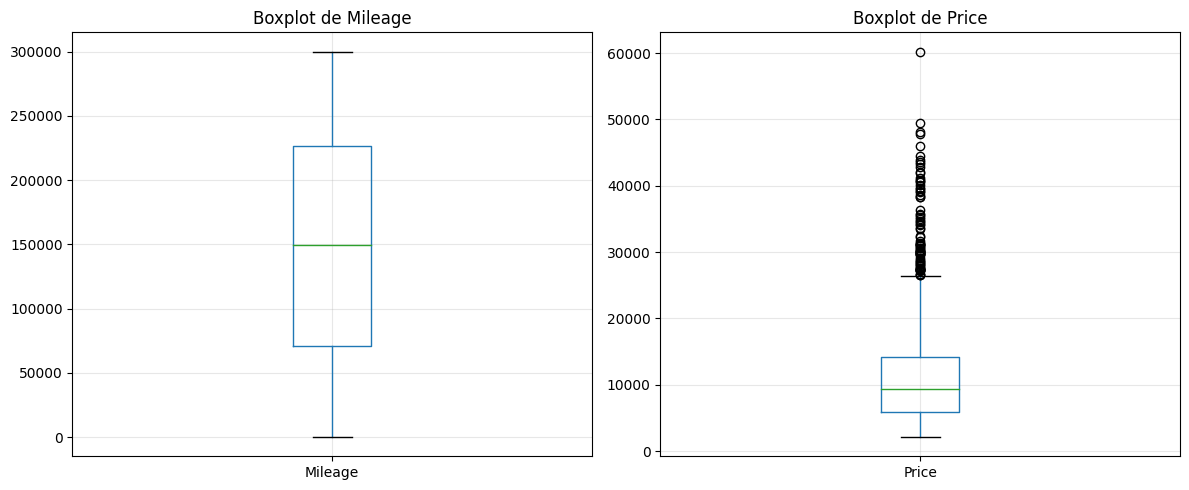

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

df.boxplot(column='Mileage', ax=axes[0])
axes[0].set_title('Boxplot de Mileage')
axes[0].grid(True, alpha=0.3)

df.boxplot(column='Price', ax=axes[1])
axes[1].set_title('Boxplot de Price')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

On s'aperçoit pour la colonne 'Mileage' qu'il n'y a aucune valeur aberrante. Mais pour la colonne Price il y en a beaucoup. On peut envisager de faire un traitement

### Matrice de corrélation

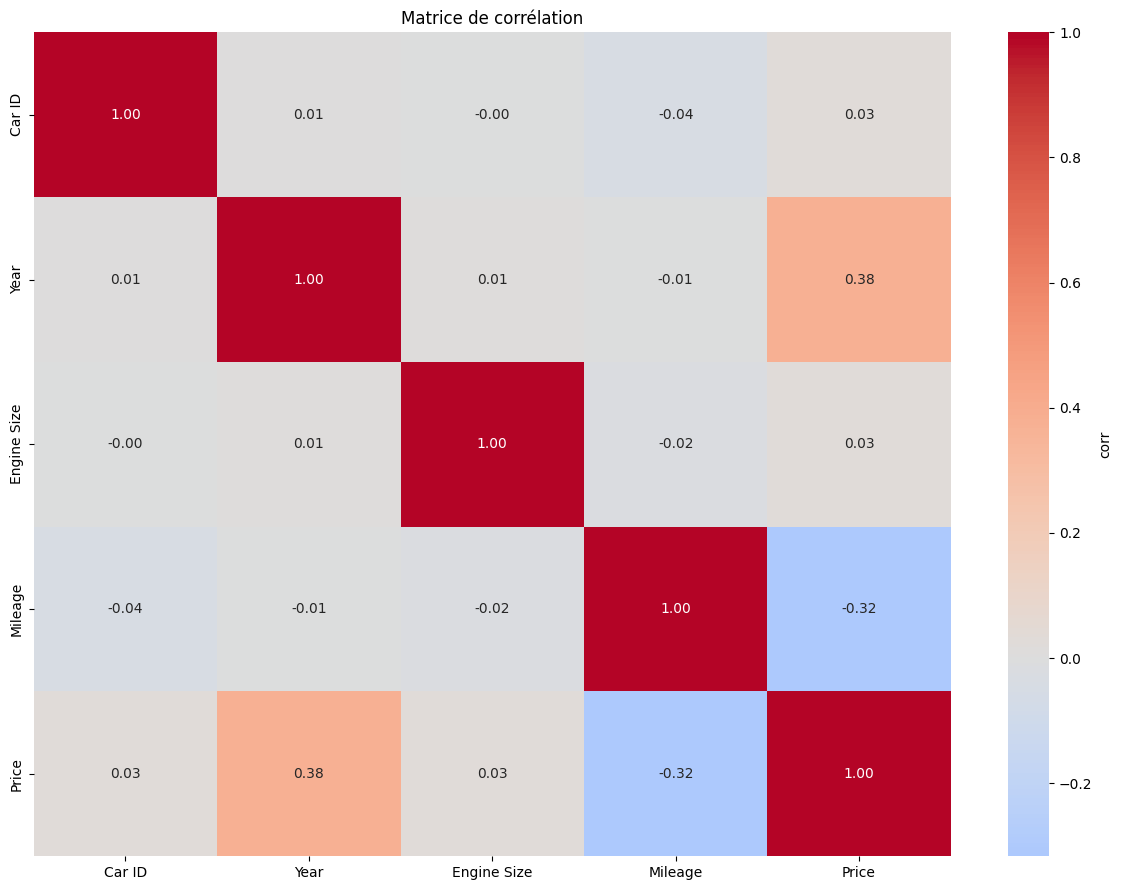

In [13]:
numeric_columns = df.select_dtypes(include=["int64", "float64"]).columns
correlation = df[numeric_columns].corr()

plt.figure(figsize=(12, 9))
sns.heatmap(correlation, cmap="coolwarm", center=0, annot=True, fmt=".2f",
            cbar_kws={"label": "corr"})
plt.title("Matrice de corrélation")
plt.tight_layout()
plt.show()

On considère qu'il y a une forte corrélation à partir de 0.80, dans notre cas toute les valeurs sont bien en-dessous. On ne va donc supprimer aucune valeur en fonction de la matrice.

### Test de Chi et V de Cramér

Le **Test de Chi** nous permet de voir si des colonnes catégorielles ont un lien entre elles:  
Si p_value < 0.05 -> dépendance statistiquement significative.   
Si p_value >= 0.05 -> pas de relation détectable  

Tandis que le **V de Cramér** va mesurer la force de ce lien:  
Plus la valeur est proche de 1 et plus le lien est fort  


Vous pouvez modifier la valeur de 'target' par une autre colonne categorielle pour vois ses corrélations avec les autres colonnes.

In [14]:
target = "Brand"
categories_columns = df.select_dtypes(include=["category"]).columns
categories_columns = [current_category for current_category in categories_columns if current_category != target]

results = []
for current_column in categories_columns:
    table = pd.crosstab(df[target], df[current_column])
    chi2, p, dof, _ = chi2_contingency(table)
    n = table.to_numpy().sum()
    r, c = table.shape
    v = np.sqrt(chi2 / (n * (min(r - 1, c - 1))))
    results.append((current_column, p, v))

chi2_df = pd.DataFrame(results, columns=["variable", "p_value", "v_cramers"])\
           .sort_values("p_value")

display(chi2_df)

,variable,p_value,v_cramers
3,Model,0.000000e+00,1.000000
0,Fuel Type,2.714703e-138,0.323458
2,Condition,4.390303e-01,0.051818
1,Transmission,8.887899e-01,0.032062


C'était pertinant de faire le test pour la variable **Brand** ou **Model**.  
Dans notre cas on l'a fait pour Brand. On peur voir avec le Test de Chi qu'il y a une forte corrélation avec les variables **Model** et **Fuel Type**.  
Model -> p_value ≃ 0. 
Fuel Type -> p_value ≃ 2.714703e-138. 
Ces deux valeurs sont inférieurs à 0.05. 

Lorsqu'on regarde ensuite le **V de Cramér**, on voit que le lien entre Model et Brand est de 1, ce qui représente la plus grande force possible. Il faudra donc supprimer une des deux colonnes.



### Distribution des valeurs numériques

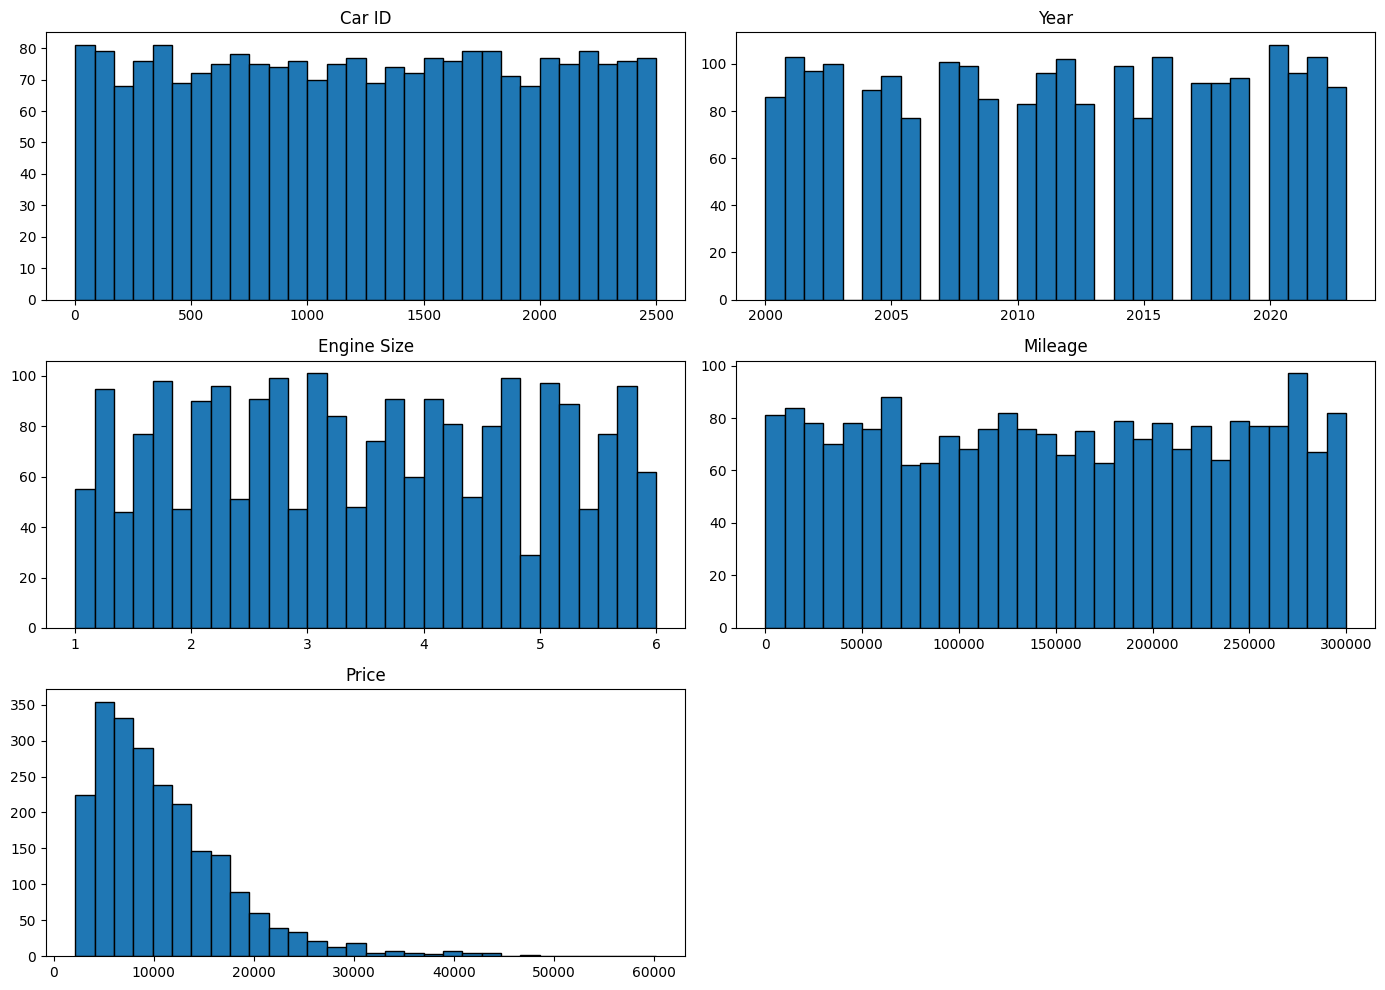

In [15]:
df.hist(figsize=(14, 10), bins=30, edgecolor='black', grid=False)
plt.tight_layout()
plt.show()

On peut observer que la courbe **Price** est une pente descendante. Comme vu précédemment, il y a beaucoup de valeurs aberrantes. On peut envisager d'en enlever.

### Distribution des valeurs catégorielles

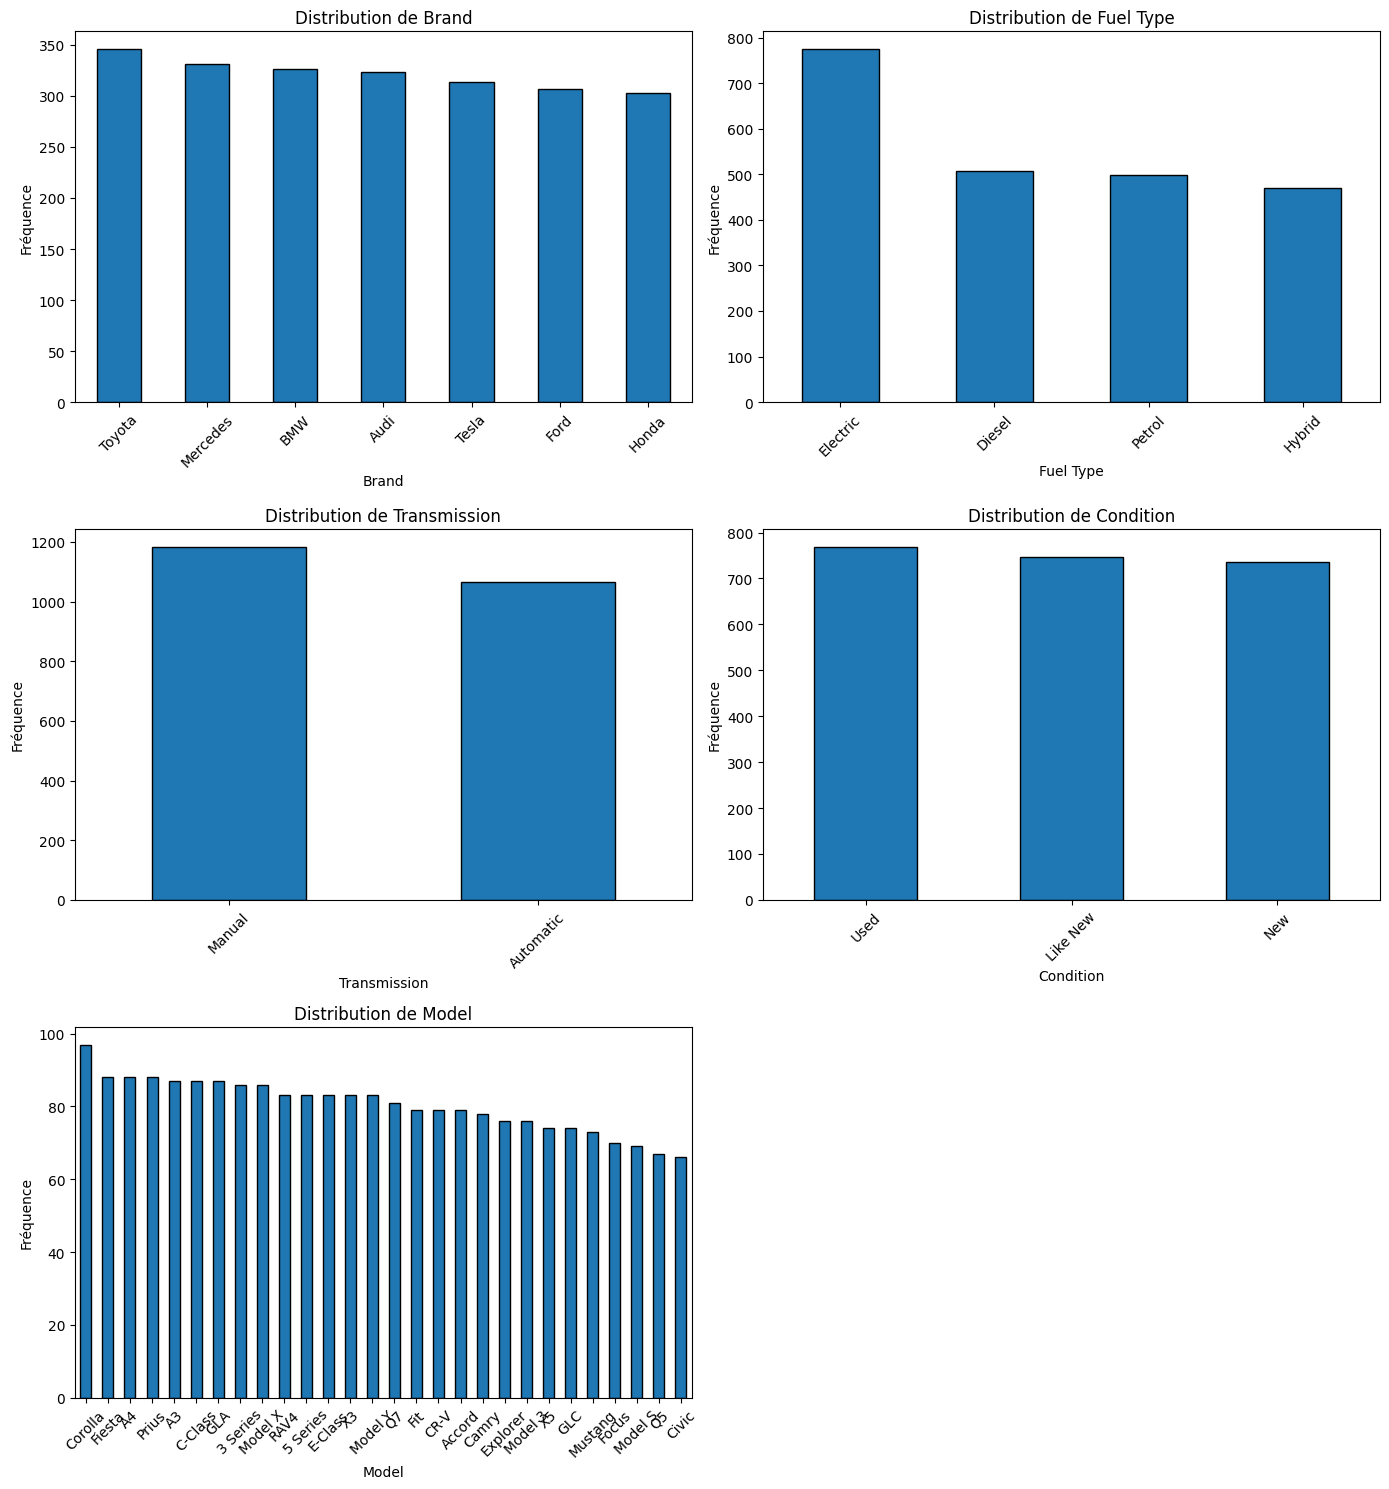

In [16]:
categories_columns = df.select_dtypes(include=["category"]).columns
n_cols = len(categories_columns)
n_rows = (n_cols + 1) // 2

fig, axes = plt.subplots(n_rows, 2, figsize=(14, 5*n_rows))
axes = axes.flatten()

for idx, col in enumerate(categories_columns):
    df[col].value_counts().plot(kind='bar', ax=axes[idx], edgecolor='black')
    axes[idx].set_title(f'Distribution de {col}')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Fréquence')
    axes[idx].tick_params(axis='x', rotation=45)

# Masquer les subplots vides
for idx in range(len(categories_columns), len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.show()

On peut voir que pourla colonne du 'Fuel Type', il y a plus d'électrique. C'est parce que certaine Tesla n'était pas en électrique et on a déjà changé la valeur.

## Graphiques pertinants

### Prix moyen par modèle de voiture

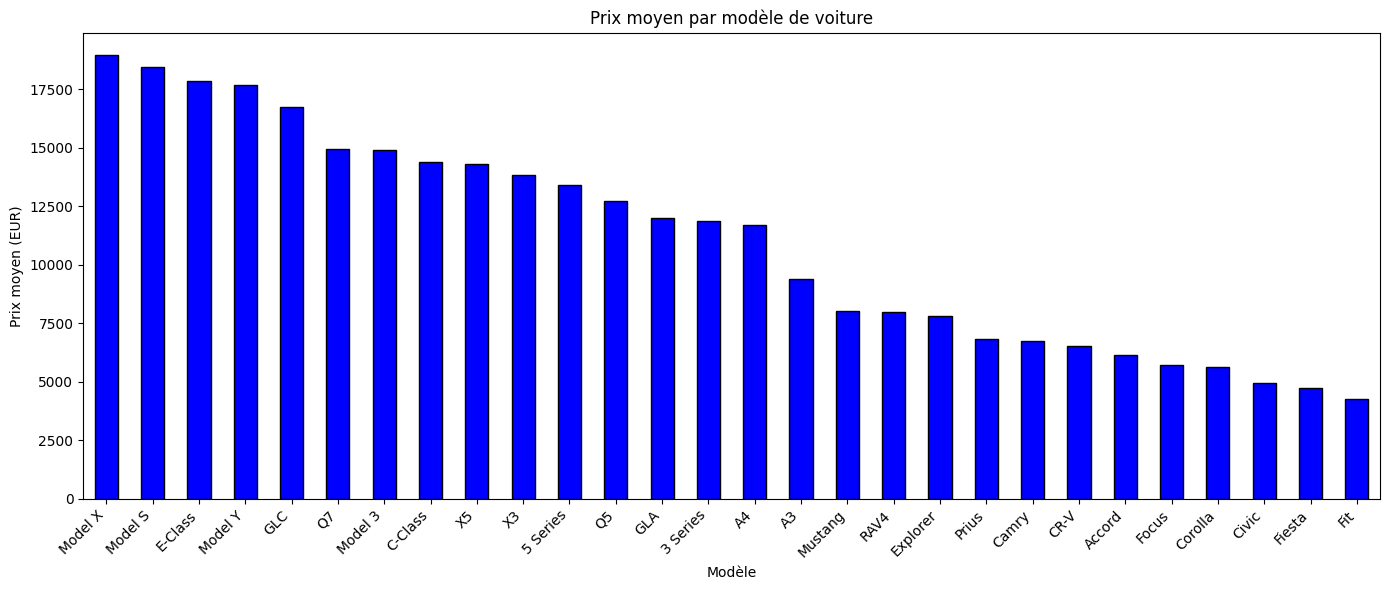

In [17]:
price_by_model = df.groupby('Model')['Price'].mean().sort_values(ascending=False)

plt.figure(figsize=(14, 6))
price_by_model.plot(kind='bar', edgecolor='black', color='blue')
plt.xlabel('Modèle')
plt.ylabel('Prix moyen (EUR)')
plt.title('Prix moyen par modèle de voiture')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

On peut voir que la répartition des prix en fonction des voitures est cohérente. Les premières voitures sont des électriques qui en général coûte plus cher.

### Prix moyen en fonction de la condition de la voiture

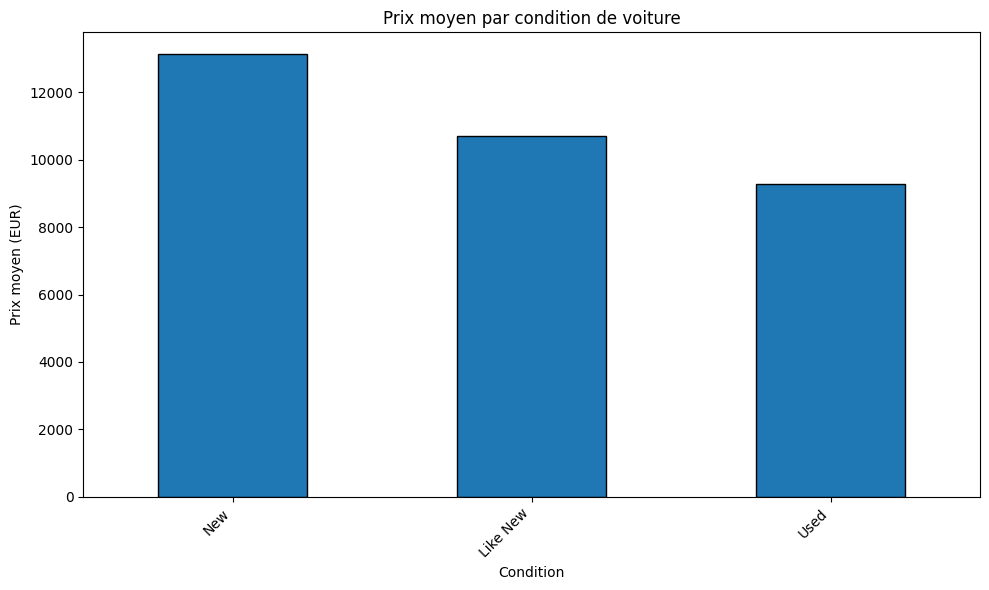

In [18]:
price_by_condition = df.groupby('Condition')['Price'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
price_by_condition.plot(kind='bar', edgecolor='black')
plt.xlabel('Condition')
plt.ylabel('Prix moyen (EUR)')
plt.title('Prix moyen par condition de voiture')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

On peut voir que le graphique est cohérent, les plus cher sont les **New** et moins cher les **Used**

### Colonnes à supprimer

Pour les colonnes numériques, nous avons décidé de supprimer **Car ID** carce n'aidera pas le modèle à mieux nous donner un prix cohérent.  
Pour les colonnes de category, nous avons décidé de supprimer **Brand** à cause de la forte corrélation avec **Model**. Garder les modèles de voitures permettra au modèle d'être plus précis dans ses prédicitions

In [19]:
df = df.drop(columns=["Car ID", "Brand"])

df.head()

,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Price,Model
0,2016,2.3,Electric,Manual,114832,New,21133.65,Model X
1,2018,4.4,Electric,Manual,143190,Used,13335.25,5 Series
2,2013,4.5,Electric,Manual,181601,New,9017.79,A4
3,2011,4.1,Electric,Automatic,68682,New,22149.30,Model Y
4,2009,2.6,Diesel,Manual,223009,Like New,4966.38,Mustang


### Colonnes à modifier

Nous avons déjà modifé le Fuel Type des voitures Tesla.

Nous avons décidé de suppirmer les valeurs abérrantes dans Price, car ça peut impacter de manière négative le modèle sur sa prédiction. Étant donné que certaines valeurs sont très éloignées, peut-être qu'il n'arrivera pas à les trouver.  
Étant donné qu'on a une distribution descendante, le mieux est d'utiliser la médiane du modèle de voiture pour remplacer les valeurs.

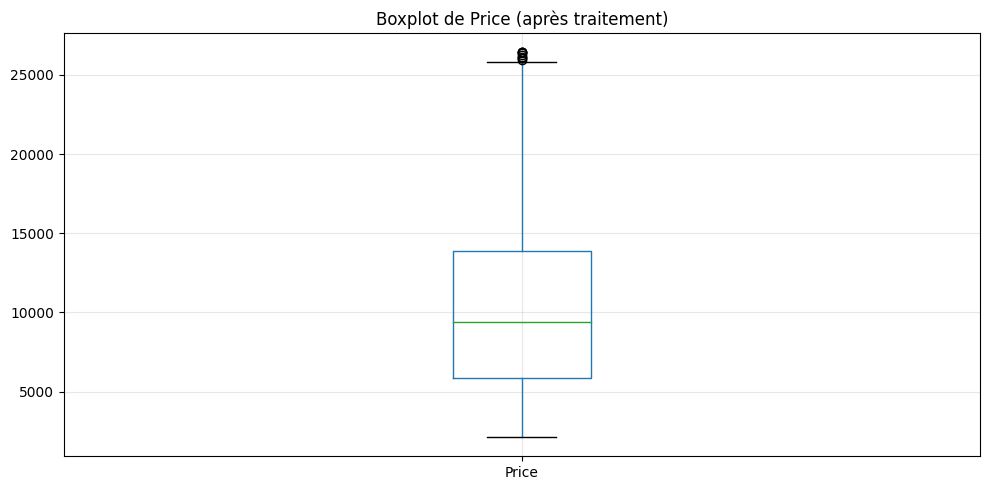

In [20]:
# Calcule des quartiles
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1

# Définition des intervalles
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Création d'un masque, chaque valeur aberrante est marquée True
is_outlier = (df['Price'] < lower_bound) | (df['Price'] > upper_bound)

# Calcule de la médiane pour chaque modèle de voiture
median_by_model = df.groupby('Model')['Price'].median()

# Remplacement des valeurs aberrantes par la médiane du modèle
for idx in df[is_outlier].index:
    model = df.loc[idx, 'Model']
    df.loc[idx, 'Price'] = median_by_model[model]

# Afficher le boxplot après traitement
plt.figure(figsize=(10, 5))
df.boxplot(column='Price')
plt.title('Boxplot de Price (après traitement)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

On va garder comme ça, il y en a beaucoup mopins et ça peut nous servir pour notre modèle non supervisé qui doit identifier les anomalies.

Nous allons également créer des tranches de valeurs pour nos labels. Si nous voulons prédire le prix exact, ça sera impossible étant donné qu'il y a trop de valeurs différente.

In [21]:
max_price = df["Price"].max()

max_price

26443.66

In [22]:
# Création de notre liste de bons avec un intervalle de 5000. On va jusqu'à la valeur maximale.
bins = list(range(0, int(max_price) + 5000, 5000))
# Création de nos labels qui sont composées de la limite inférieur et supérieur de chaque bin
labels = [f'{bins[i]}-{bins[i+1]}' for i in range(len(bins)-1)]

# On associe chaque prix à la catégorie correspondante
df['Price'] = pd.cut(df['Price'], bins=bins, labels=labels, right=True)

df.head(10)

,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Price,Model
0,2016,2.3,Electric,Manual,114832,New,20000-25000,Model X
1,2018,4.4,Electric,Manual,143190,Used,10000-15000,5 Series
2,2013,4.5,Electric,Manual,181601,New,5000-10000,A4
3,2011,4.1,Electric,Automatic,68682,New,20000-25000,Model Y
4,2009,2.6,Diesel,Manual,223009,Like New,0-5000,Mustang
5,2019,2.4,Diesel,Automatic,246553,Like New,10000-15000,Q7
6,2020,4.0,Electric,Automatic,135486,Used,15000-20000,Q5
7,2017,5.3,Electric,Automatic,83030,New,15000-20000,Model Y
8,2023,5.7,Electric,Manual,120360,Like New,10000-15000,Civic
9,2010,1.5,Electric,Automatic,135009,Like New,5000-10000,Explorer


On peut voir qu'on a bien définit des intervalles pour nos labels.

## Sauvegarde dans un autre csv pour la poartie processing et entraînement

In [23]:
df.to_csv('../data/car_price_cleaned.csv', index=False)